# Potencial de Ionización

En esta notebook realizamos el análisis de los datos recabados para el potencial de ionización del bulbo 2D21 por medio de la medición de voltaje y corriente. Estos datos están almacenados en un archivo de Excel.

El próposito de esta notebook es cargar los datos, realizar el ánalisis mediante el ajuste de los datos a la expresión de Langsmuir-Child, junto con la generación de gráficas con la incertidumbre adecuada.

In [1]:
# Descargamos las librerias necesarias
!pip install pandas openpyxl

In [2]:
# Librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [3]:
# Cargamos el archivo
path = '/content/drive/MyDrive/Laboratory_Reports/Potencial_Ionizacion/Potencial_de_Ionizacion.xlsx'

In [4]:
# Leemos el archivo
data = pd.read_excel(path, sheet_name=None)

In [5]:
# La variable data es un dictionario, y las keys son las hojas.
keys = data.keys()
keys

dict_keys(['M1', 'M(2)', 'M(3)', 'M(4)', 'M(5)', 'M(6)', 'M(7)', 'M(8)', 'M(9)', 'M(10)', 'M(11)', 'M(12)', 'M(13)', 'M(14)', 'M(15)'])

Desde M1 hasta M12 contiene datos completos. M13 a M15 contiene datos refinados en el intervalo de interés.

In [6]:
data_1 = data['M1']
data_1.head()

,Voltaje (V),Corriente (mA),Corriente (A),Incertidumbre V,Incertidumbre A,Error V,Error A
0,1.245,1.023,0.001023,0.000087,0.000562,0.007016,0.054888
1,1.702,1.372,0.001372,0.000101,0.000736,0.005938,0.053644
2,2.213,1.767,0.001767,0.000116,0.000933,0.005259,0.052830
3,2.702,2.156,0.002156,0.000131,0.001128,0.004850,0.052319
4,3.218,2.576,0.002576,0.000147,0.001338,0.004554,0.051941


In [7]:
data_1.shape

(24, 7)

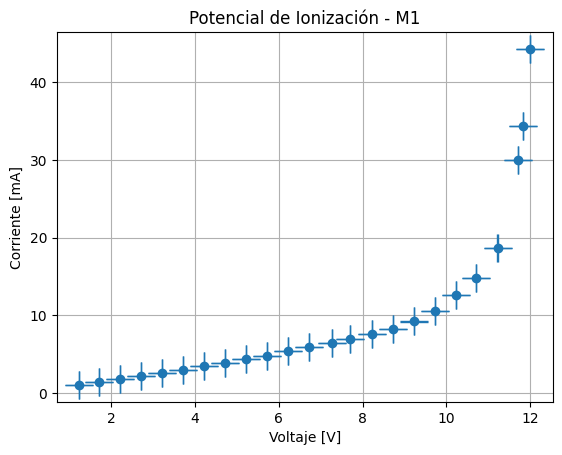

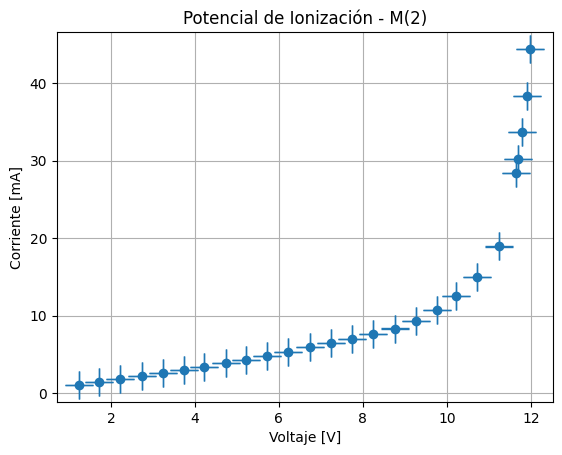

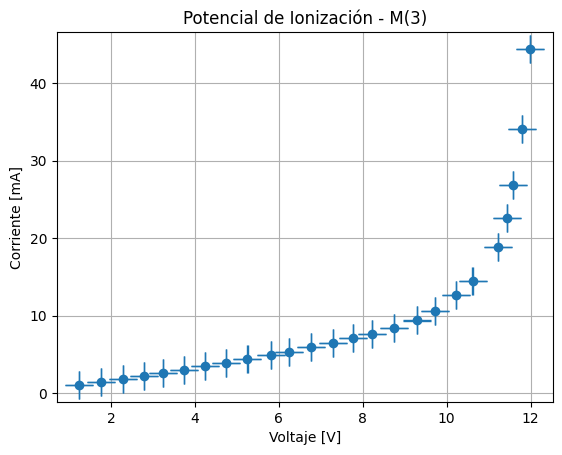

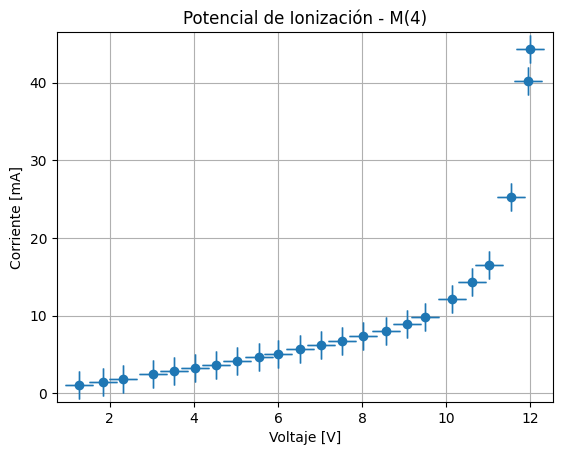

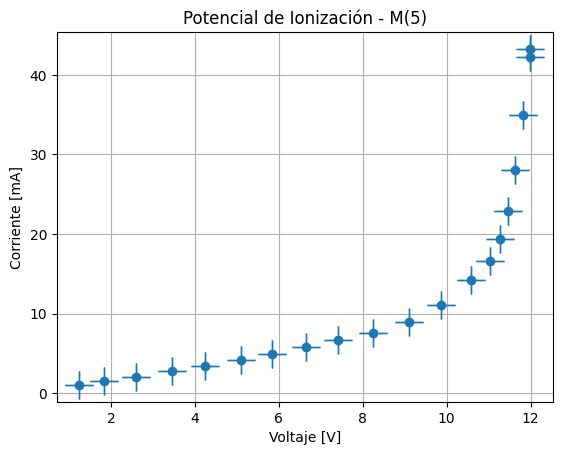

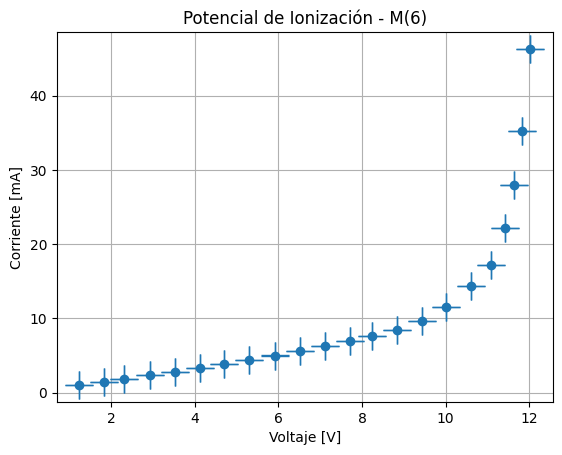

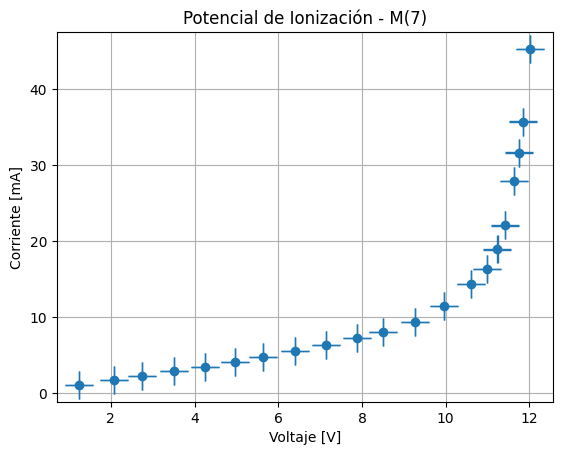

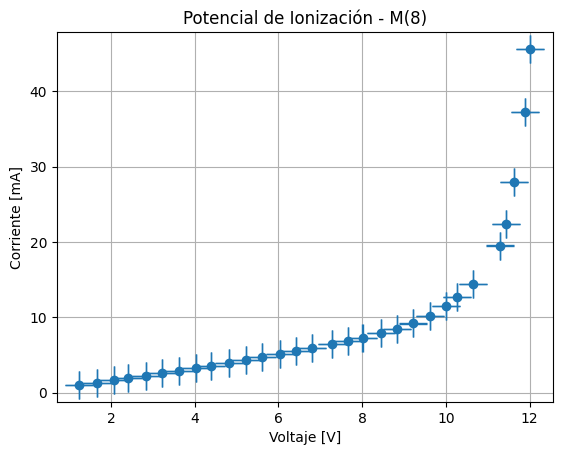

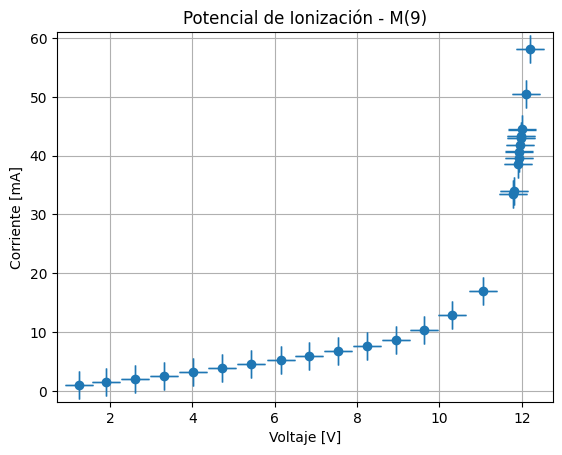

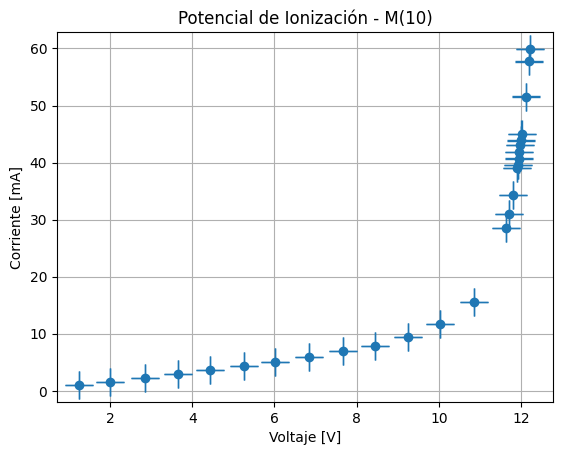

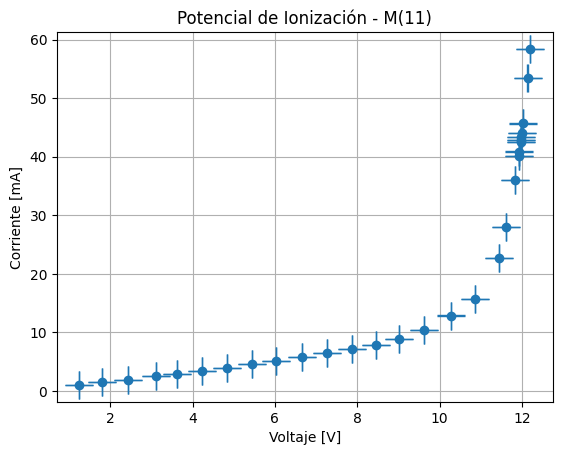

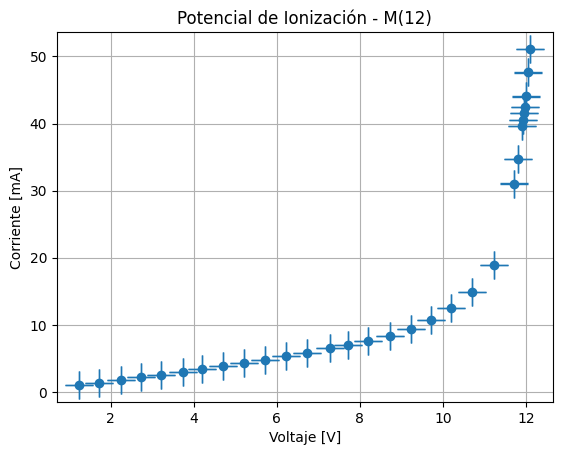

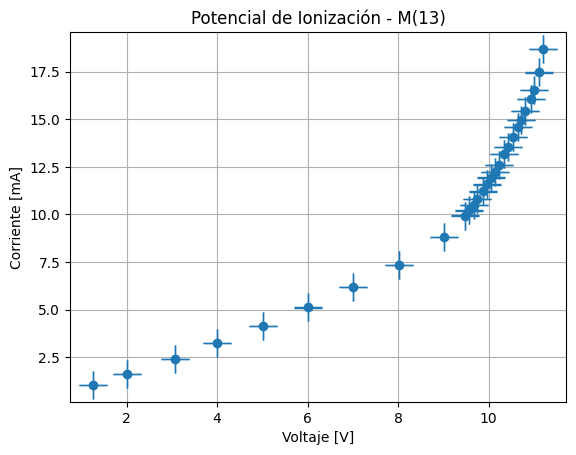

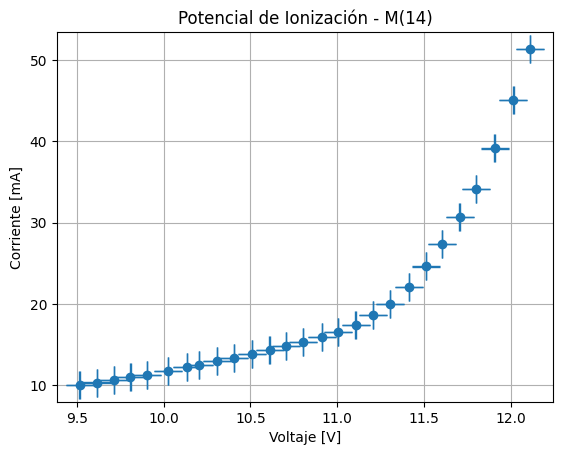

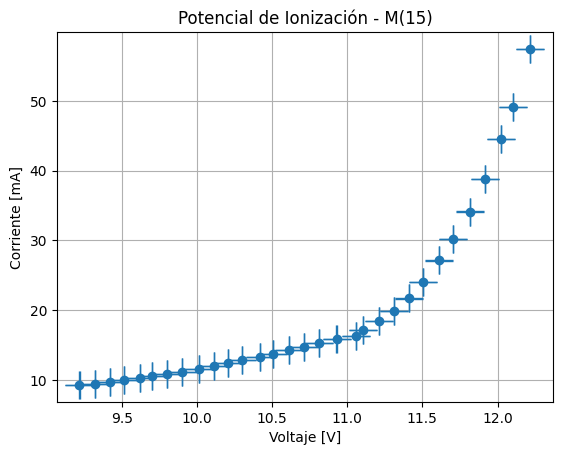

In [8]:
# Generamos las graficas
for i in keys:
  data_g = np.array(data[i])
  plt.errorbar(x = data_g[:, 0], y = data_g[:, 1], xerr= data_g[:, 3], yerr=data_g[:, 4], fmt = 'o', capsize = 10)
  #plt.scatter(data_g[:, 0], data_g[:,1])
  plt.grid()
  plt.xlabel('Voltaje [V]')
  plt.ylabel('Corriente [mA]')
  plt.title('Potencial de Ionización - {:}'.format(i))
  plt.savefig('/content/drive/MyDrive/Laboratory_Reports/Potencial_Ionizacion/images/'+ i + '.png' )
  plt.show()

La grafica que contiene todos los datos se visualiza como:

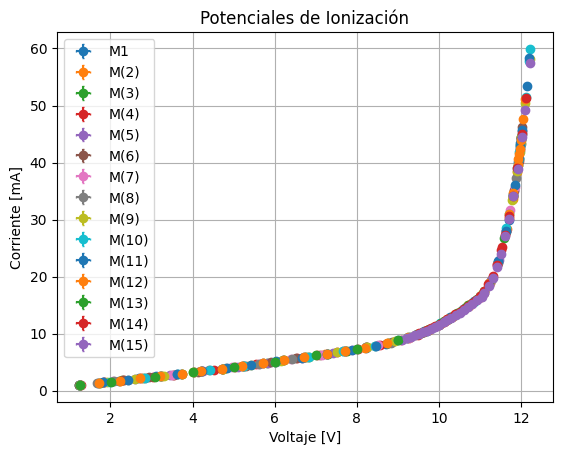

In [9]:
# Generamos las graficas
for i in keys:
  data_g = np.array(data[i])
  plt.errorbar(x = data_g[:, 0], y = data_g[:, 1], xerr= data_g[:, 3], yerr=data_g[:, 4], fmt = 'o', capsize = 1, label = i)
  #plt.scatter(data_g[:, 0], data_g[:,1], label = i, s = 5)

plt.grid()
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('Potenciales de Ionización')
plt.legend()
plt.savefig('/content/drive/MyDrive/Laboratory_Reports/Potencial_Ionizacion/images/all_potentials.png' )
plt.show()

La grafica total se ve de esta forma:

In [10]:
keys = list(keys)

In [11]:
x =np.zeros(0)
y = np.zeros(0)

In [12]:
for i in range(len(keys)):
  data_1 = np.array(data[ keys[i] ])
  x = np.concatenate( (x, data_1[:, 0]) )
  y = np.concatenate( (y, data_1[:, 2]) )

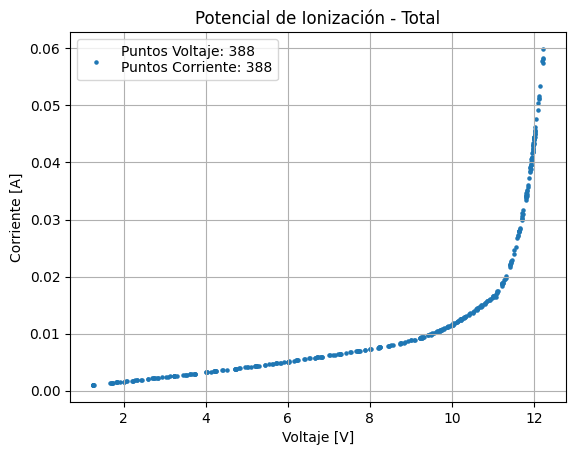

In [13]:
plt.scatter(x,y, s = 5, label = 'Puntos Voltaje: {:}\nPuntos Corriente: {:}'.format(x.shape[0], y.shape[0]))
plt.grid()
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.title('Potencial de Ionización - Total')
plt.legend()
plt.savefig('/content/drive/MyDrive/Laboratory_Reports/Potencial_Ionizacion/images/all_points.png' )
plt.show()

In [24]:
std_x = np.std(x)
error = std_x/x.shape[0]
print(error*100)

0.8912121785956437


In [14]:
xy = np.stack((x,y), axis =1 )
xy.shape

(388, 2)

In [15]:
xy = xy[ xy[:,0].argsort()]

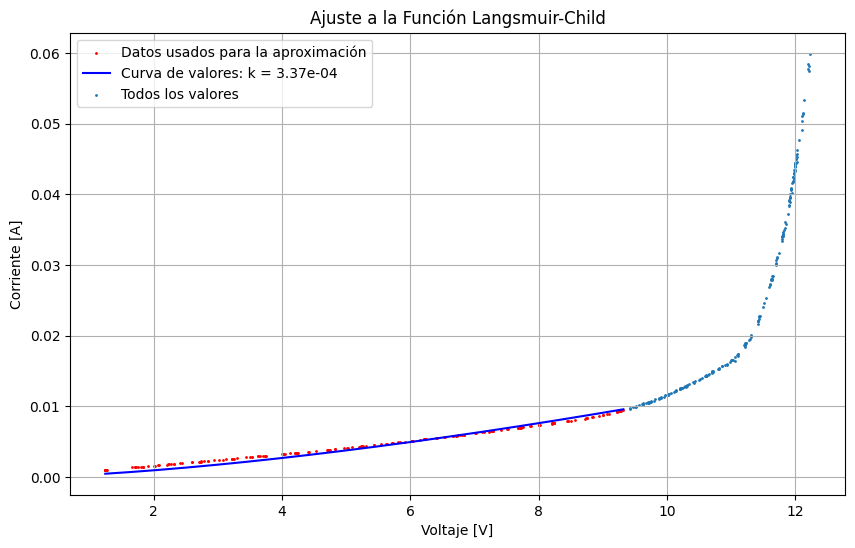

In [16]:
# Valor de iteracion
n = 200-10
#n = 100

# Librerias a usar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función que queremos ajustar
def exponencial(v, k):
    return k * (v)**(3/2)

# Datos de entrada
x_data = np.array(xy[:n, 0] )
y_data = np.array(xy[:n, 1])

# Ajustar los datos a la función exponencial
popt, pcov = curve_fit(exponencial, x_data, y_data  )

# Obtener los parámetros ajustados
k = popt

# Generar valores ajustados para la gráfica
x_fit = np.linspace(min(x_data), max(x_data), n)
y_fit = exponencial(x_fit, *popt)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(x_data, y_data, color='red', label='Datos usados para la aproximación', s = 1)

# Graficar la curva ajustada
plt.plot(x_fit, y_fit, color='blue', label =  'Curva de valores: k = {:.2e}'.format(k[0]))
plt.scatter(xy[n:, 0], xy[n:, 1], label = 'Todos los valores', s = 1)

# Añadir títulos y etiquetas
plt.title('Ajuste a la Función Langsmuir-Child')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.legend()

# Mostrar la gráfica
plt.grid(True)

plt.savefig('/content/drive/MyDrive/Laboratory_Reports/Potencial_Ionizacion/images/ajuste.png' )
plt.show()

In [17]:
xy[n-1]

array([9.321   , 0.009456])

In [18]:
xy[-1]

array([12.227  ,  0.05989])

In [19]:
print('El coeficiente de relación hasta n: {:} corresponde a {:.4f}'.format(n, r2_score(y_fit, y_data)))

El coeficiente de relación hasta n: 190 corresponde a 0.9853


In [20]:
while (r2_score(y_fit,y_data)>0.99):
  n += 1
  x_data = np.array(xy[:n, 0])
  y_data = np.array(xy[:n, 1])

  # Ajustar los datos a la función exponencial
  popt, pcov = curve_fit(exponencial, x_data, y_data  )

  # Obtener los parámetros ajustados
  k = popt

  # Generar valores ajustados para la gráfica
  x_fit = np.linspace(min(x_data), max(x_data), n)
  y_fit = exponencial(x_fit, *popt)

else:
  print('El valor de n donde la correlación cae al 99.5% corresponde a:', n)







El valor de n donde la correlación cae al 99.5% corresponde a: 190


In [21]:
n = 190

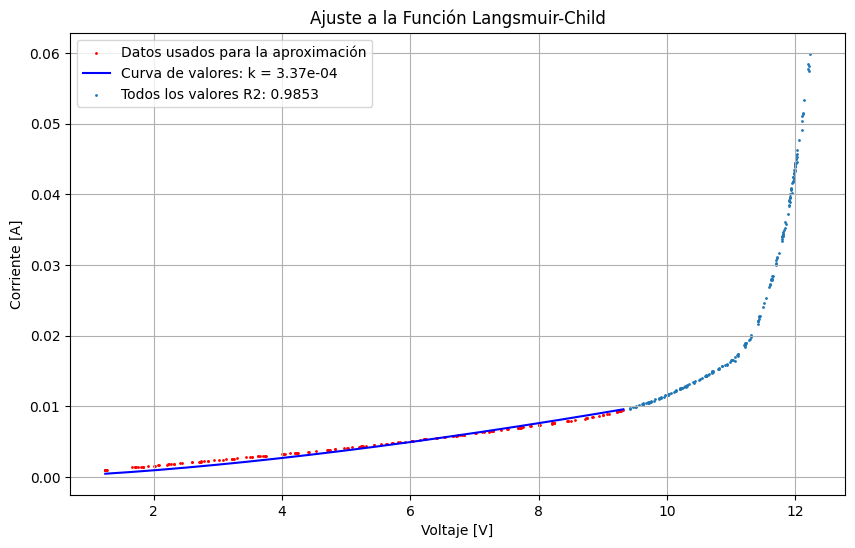

In [22]:
# Librerias a usar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función que queremos ajustar
def exponencial(v, k):
    return k * (v)**(3/2)

# Datos de entrada
x_data = np.array(xy[:n, 0] )
y_data = np.array(xy[:n, 1])

# Ajustar los datos a la función exponencial
popt, pcov = curve_fit(exponencial, x_data, y_data  )

# Obtener los parámetros ajustados
k = popt

# Generar valores ajustados para la gráfica
x_fit = np.linspace(min(x_data), max(x_data), n)
y_fit = exponencial(x_fit, *popt)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(x_data, y_data, color='red', label='Datos usados para la aproximación', s = 1)

# Graficar la curva ajustada
plt.plot(x_fit, y_fit, color='blue', label =  'Curva de valores: k = {:.2e}'.format(k[0]))
plt.scatter(xy[n:, 0], xy[n:, 1], label = 'Todos los valores R2: {:.4f}'.format(r2_score(y_fit, y_data)) , s = 1)

# Añadir títulos y etiquetas
plt.title('Ajuste a la Función Langsmuir-Child')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.legend()

# Mostrar la gráfica
plt.grid(True)

plt.savefig('/content/drive/MyDrive/Laboratory_Reports/Potencial_Ionizacion/images/ajuste_235.png' )
plt.show()

In [23]:
(1 - r2_score(y_fit, y_data) )*100

1.4711708661726774